<a href="https://colab.research.google.com/github/samreed83/Analysis_Projects/blob/main/Marketing_Campaign_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/marketing_campaign.csv')

In [3]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,3,8,10,4,7,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,5,3,6,5,0,0


In [4]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [7]:
df.shape

(2240, 20)

In [8]:
import matplotlib
matplotlib.style.use ('ggplot')

In [9]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

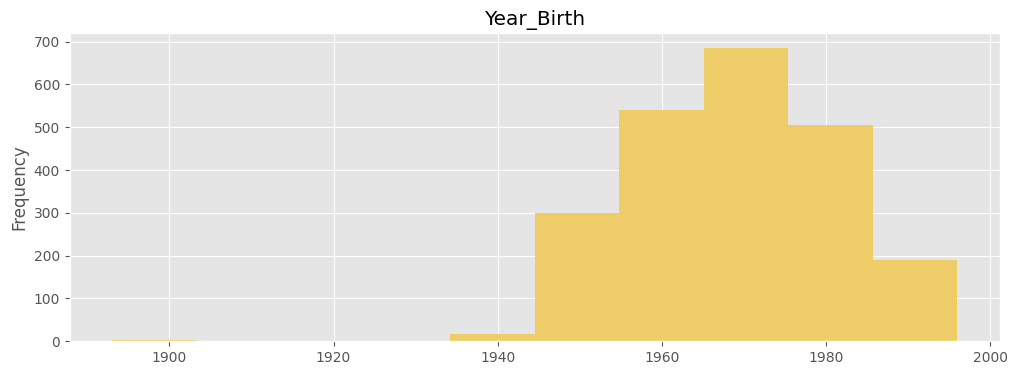

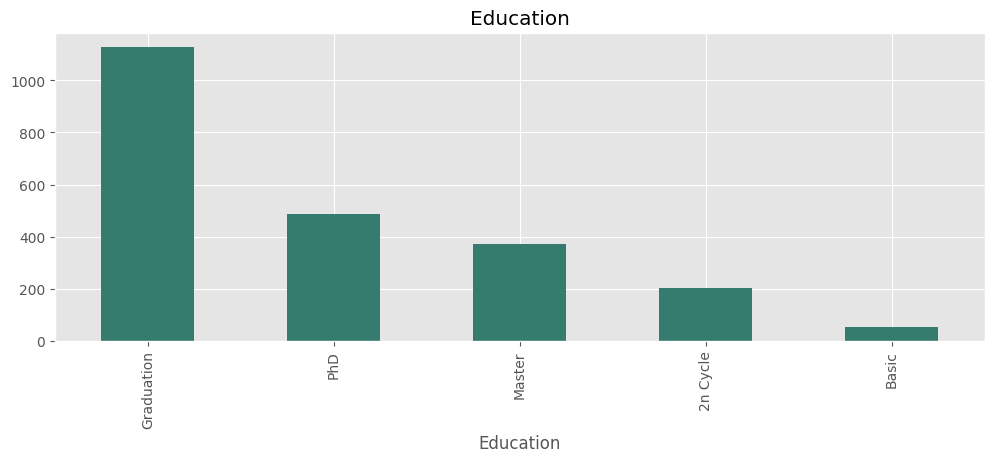

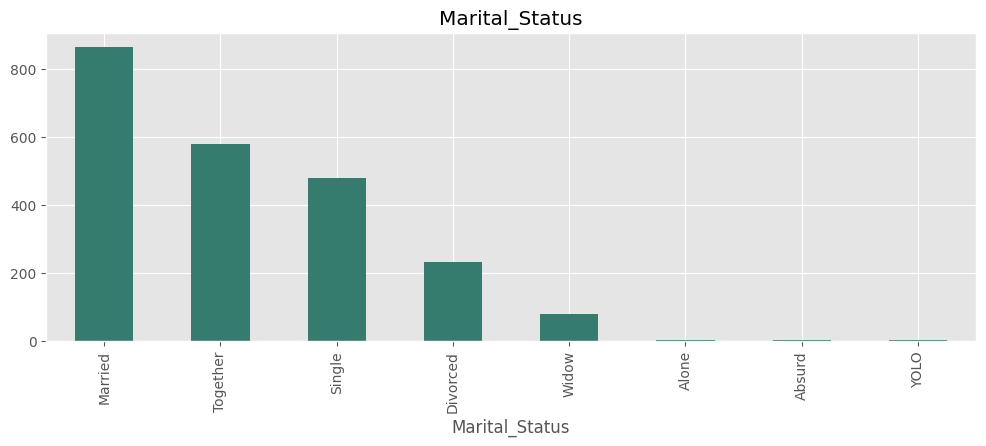

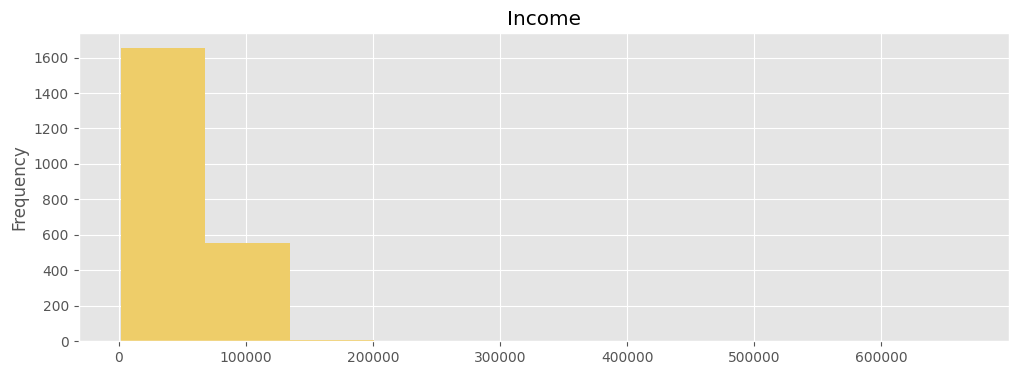

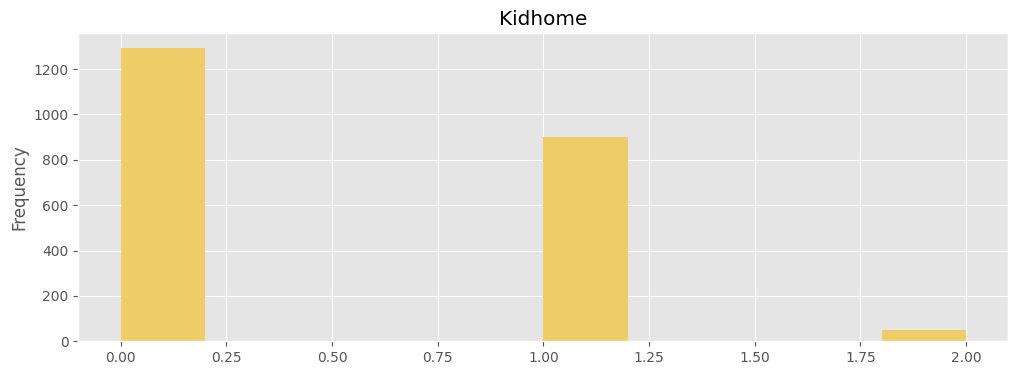

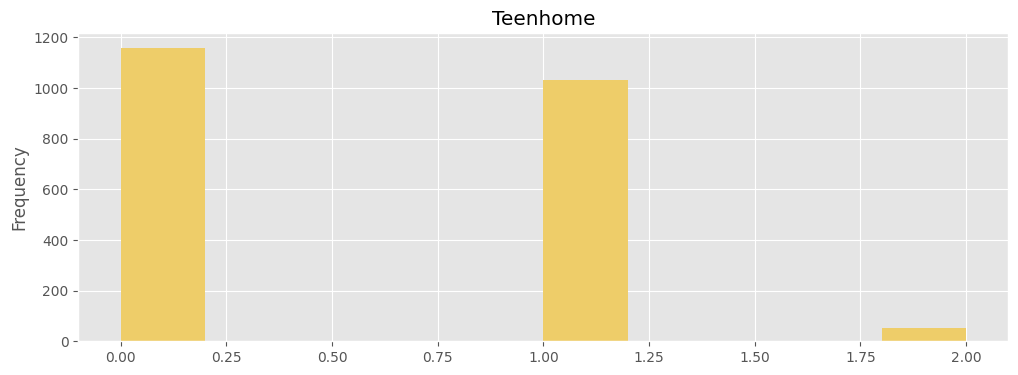

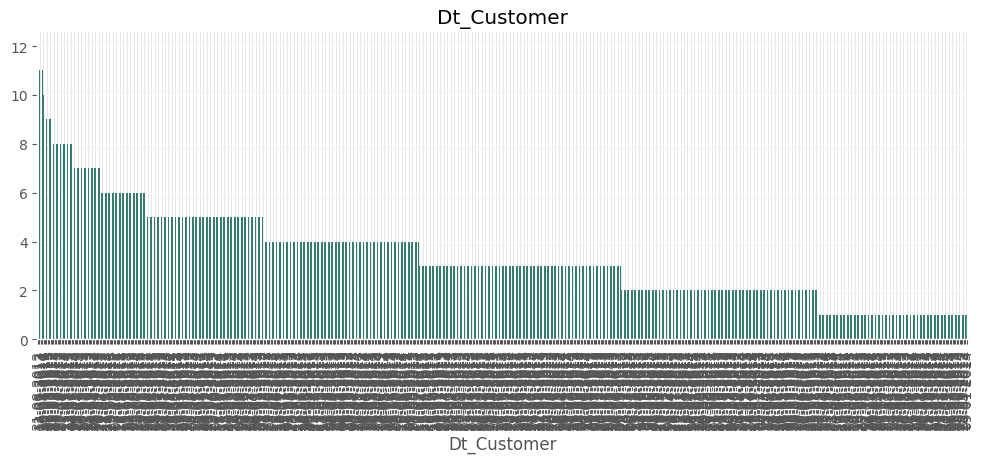

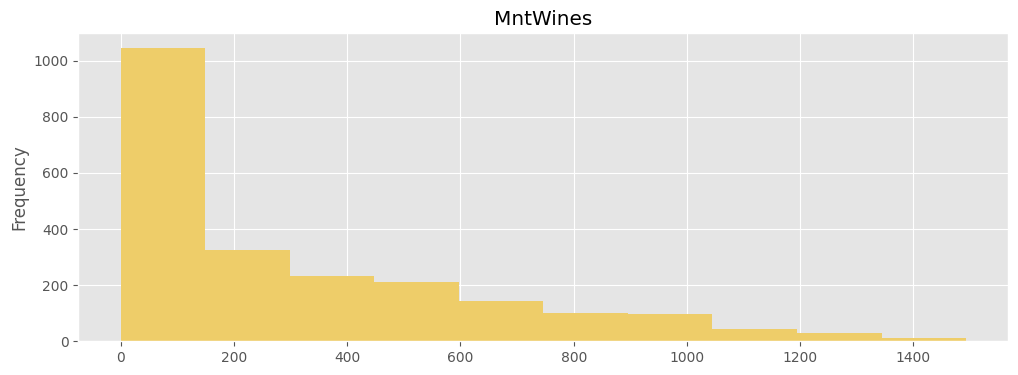

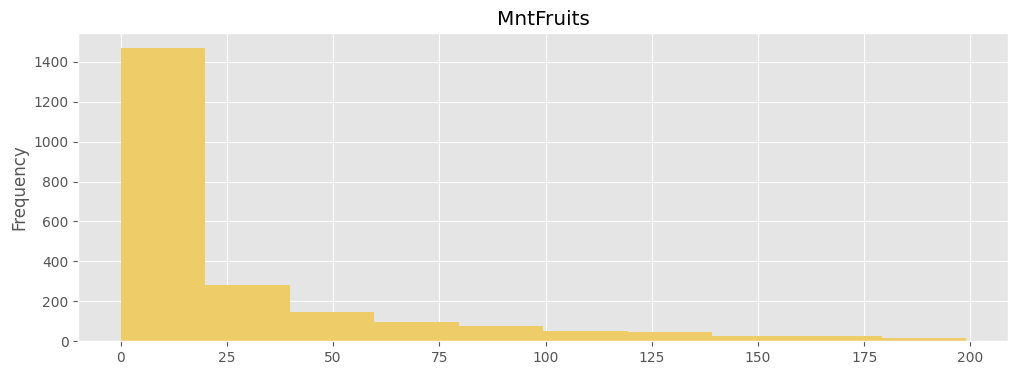

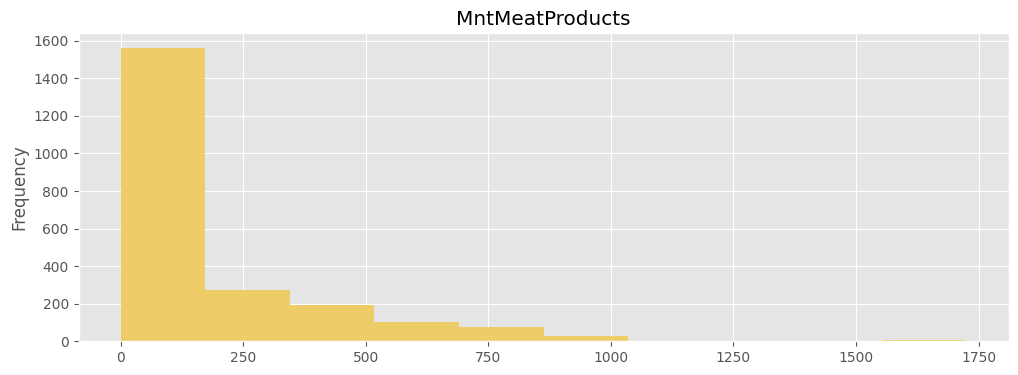

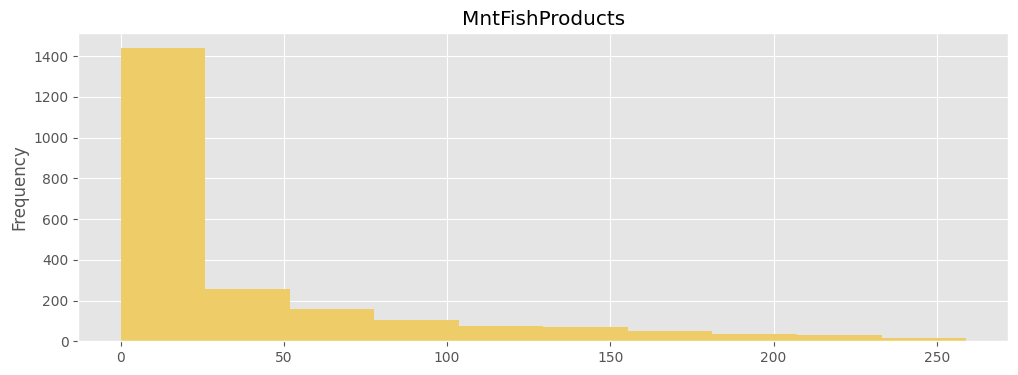

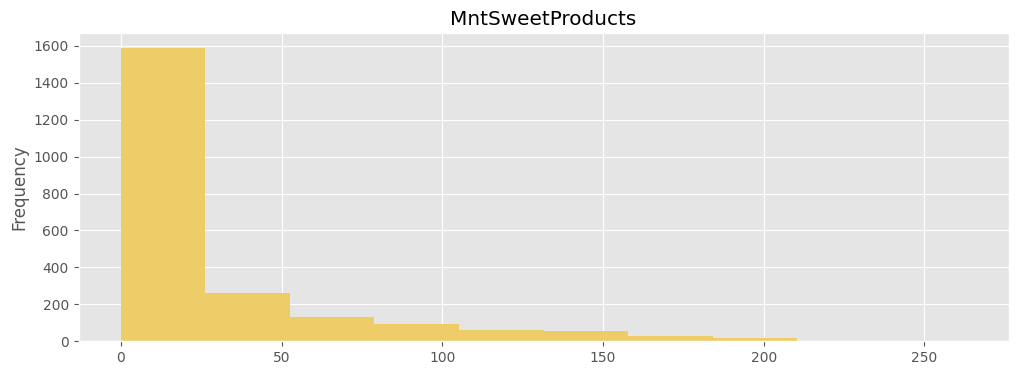

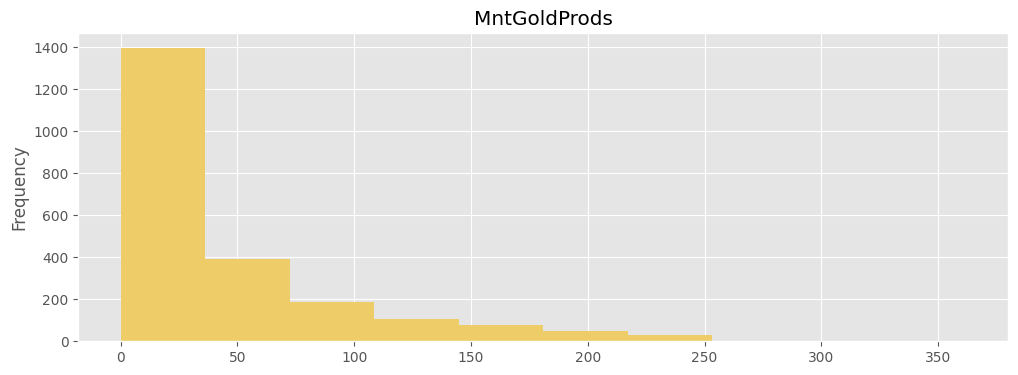

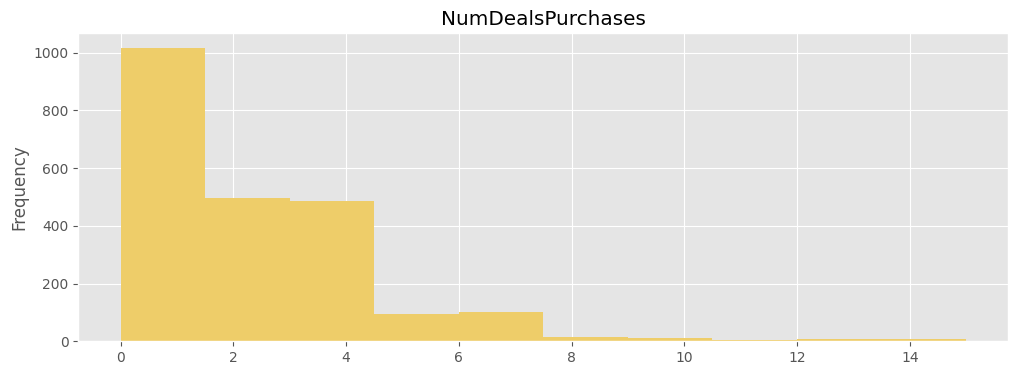

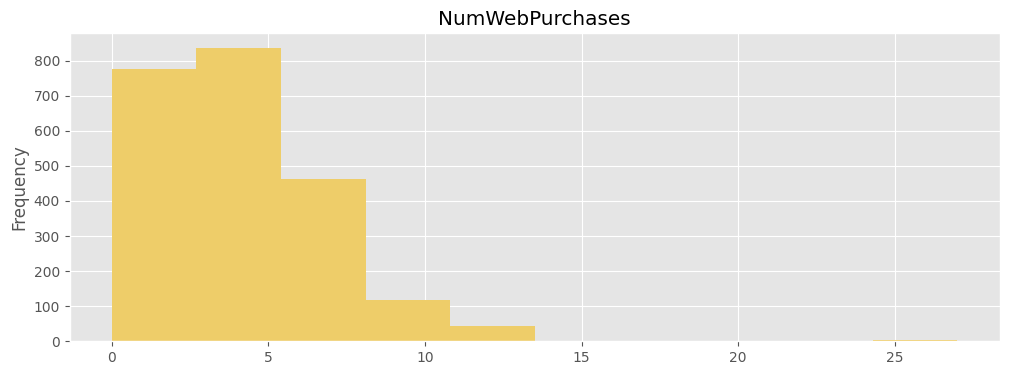

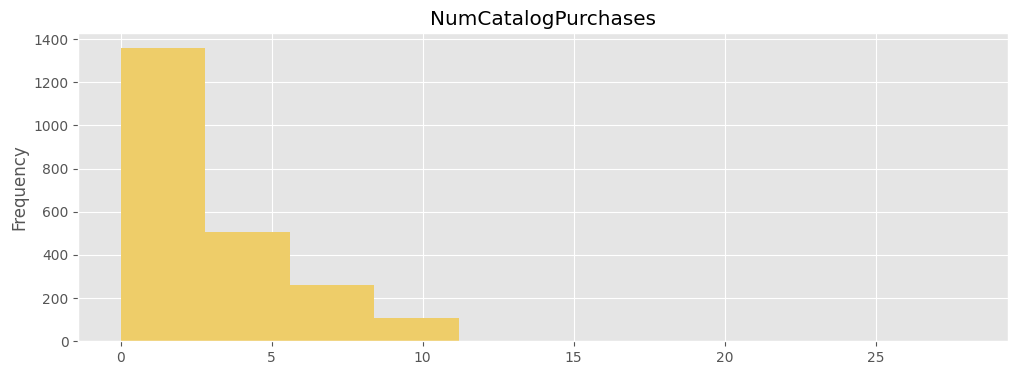

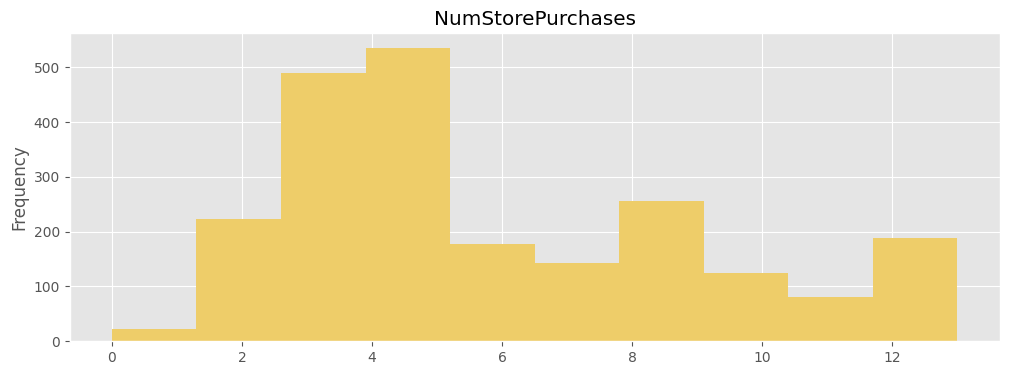

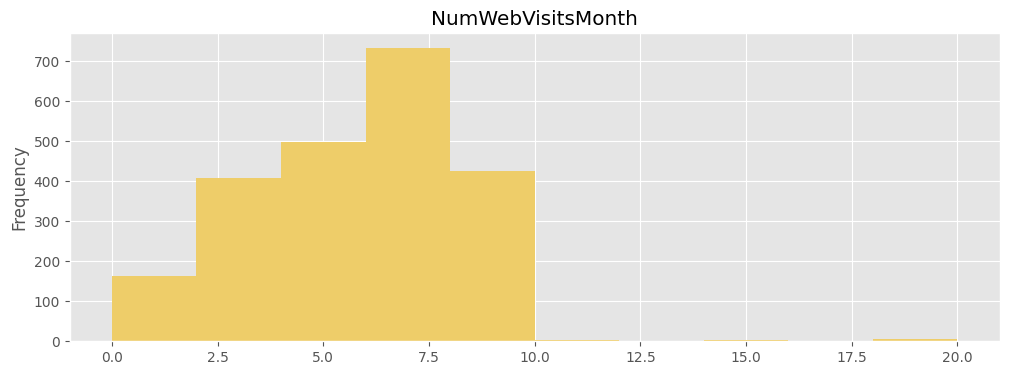

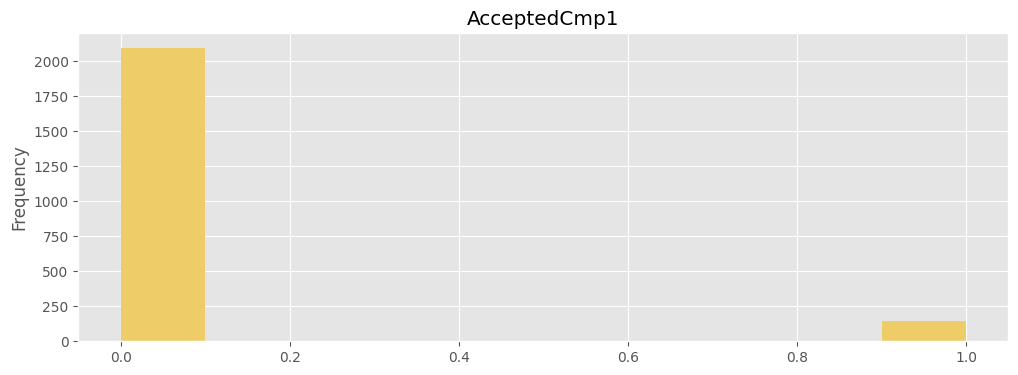

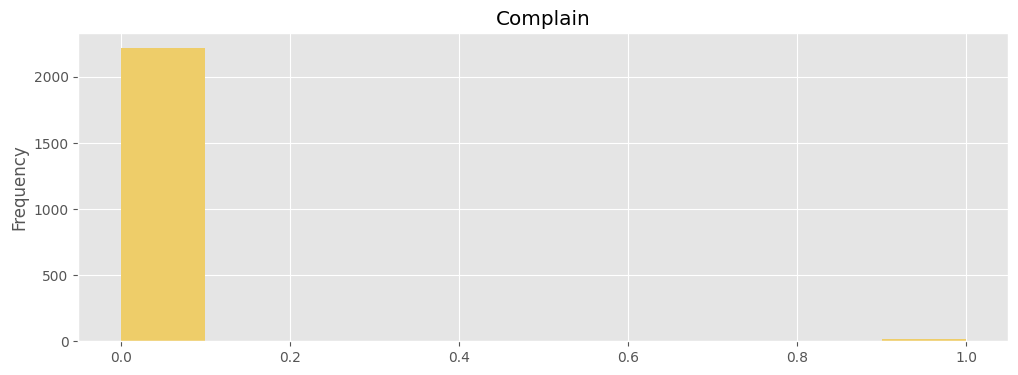

In [13]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    df[feat].value_counts().plot(kind='bar', figsize=(12,4), title=feat, color=palette[0])
  else:
    df[feat].plot (kind='hist',figsize=(12,4), title=feat, color=palette[1])
  plt.show()


In [14]:
df['Dt_Customer']

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [15]:
df['Month'] =pd.DatetimeIndex(df['Dt_Customer']).month

In [16]:
df['Month'].value_counts()

,count
Month,
8,211
10,209
3,202
12,202
5,192
1,191
2,187
11,185
4,184


In [17]:
df[df['Income'] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,9,14,18,...,1,12,4,3,1,3,6,0,0,2


In [18]:
df['Income'] = df['Income'].replace(666666.0,66666.0)

In [19]:
df[df['Income'] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month


<Axes: xlabel='Income'>

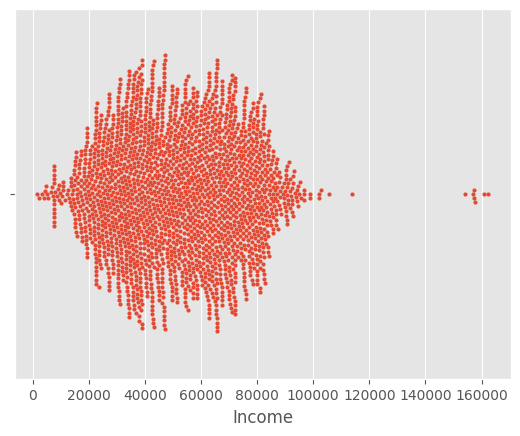

In [20]:
sns.swarmplot(data=df, x='Income', s=3)

In [22]:
maxv =df['Income'].max()
minv =df['Income'].min()
bns= [minv,35000,65000,85000,maxv]
df['Income_cat'] =pd.cut(df['Income'],bins=bns, labels=bns[:-1])

In [27]:
df.groupby('Income_cat').mean(numeric_only=True)

<ipython-input-27-6aa42721a8a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_cat').mean(numeric_only=True)


,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month
Income_cat,,,,,,,,,,,,,,,,,,
1730.0,1974.027372,25138.563869,0.791971,0.250000,21.361314,5.950730,22.324818,8.591241,5.833942,16.266423,2.023723,2.003650,0.472628,2.961679,6.974453,0.000000,0.009124,6.381387
35000.0,1966.811302,49683.932392,0.493441,0.754793,249.109990,16.591322,88.812311,22.967709,16.134208,41.374369,2.972755,4.365288,1.970737,5.610494,5.878910,0.016145,0.011100,6.589304
65000.0,1966.975862,74108.360345,0.086207,0.381034,603.806897,56.301724,371.308621,82.541379,58.263793,71.684483,1.679310,5.387931,5.298276,8.531034,3.289655,0.153448,0.008621,6.674138
85000.0,1970.958333,95652.291667,0.062500,0.145833,701.041667,62.979167,567.229167,83.968750,72.041667,61.802083,1.093750,5.250000,6.604167,7.541667,2.197917,0.385417,0.000000,5.614583


In [28]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

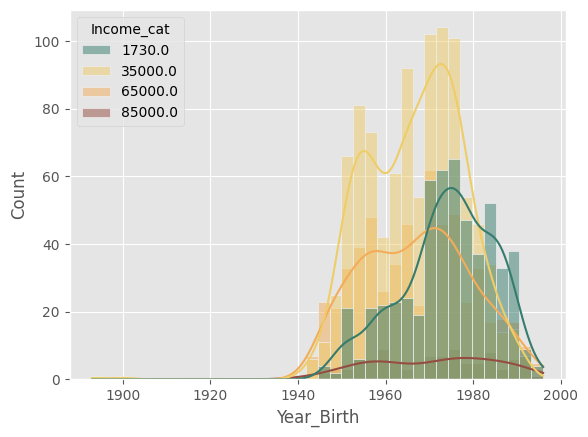

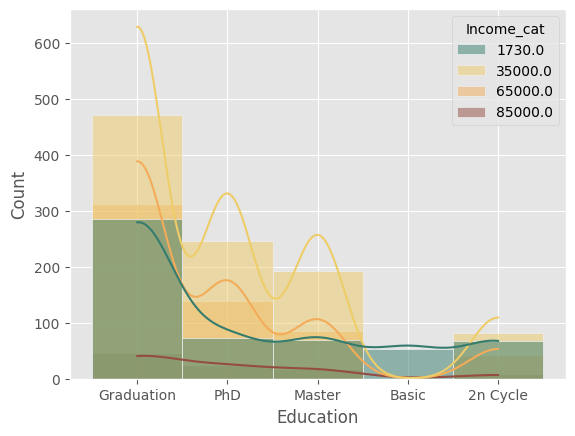

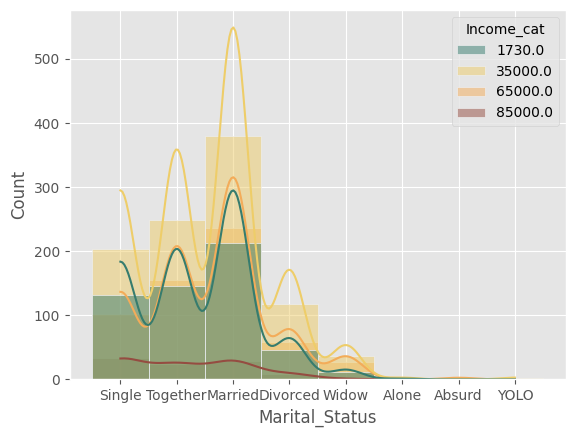

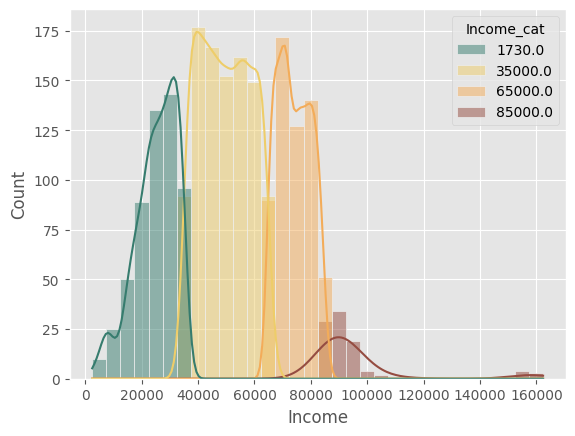

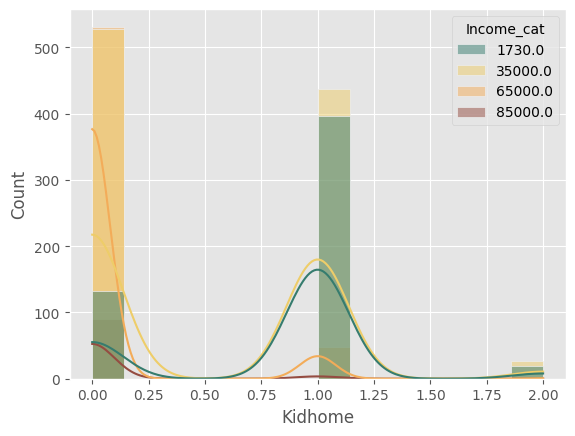

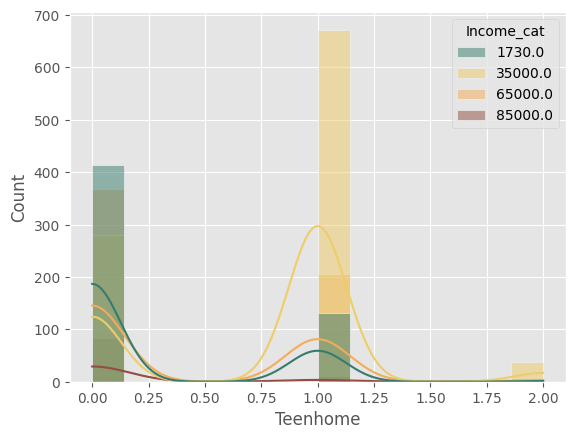

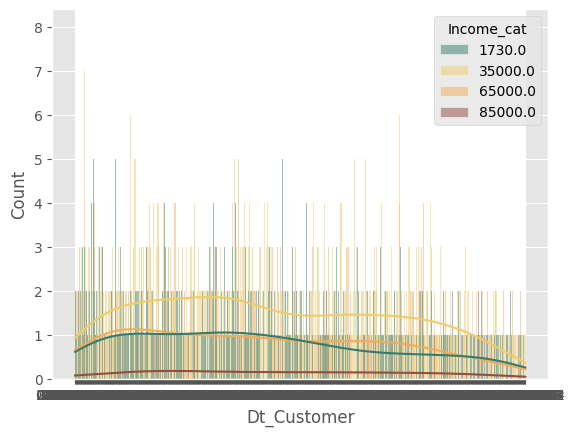

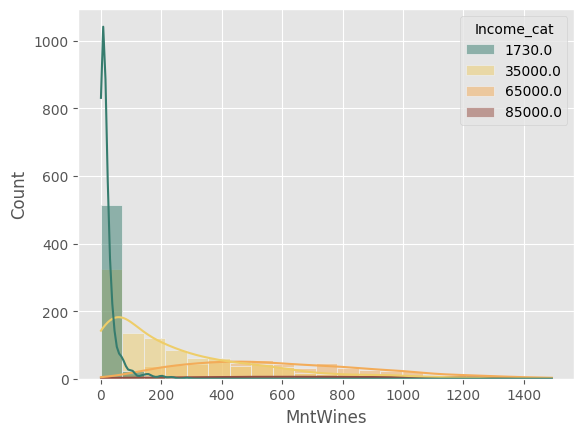

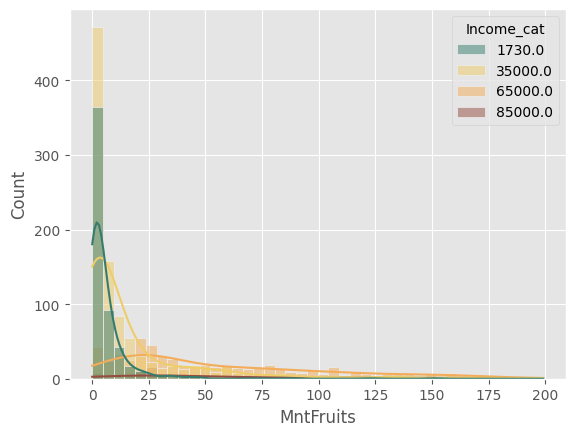

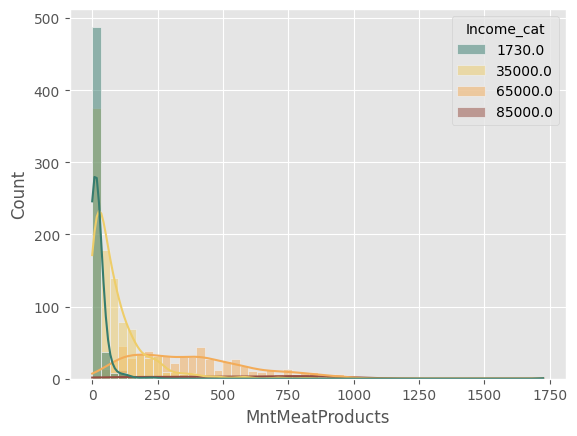

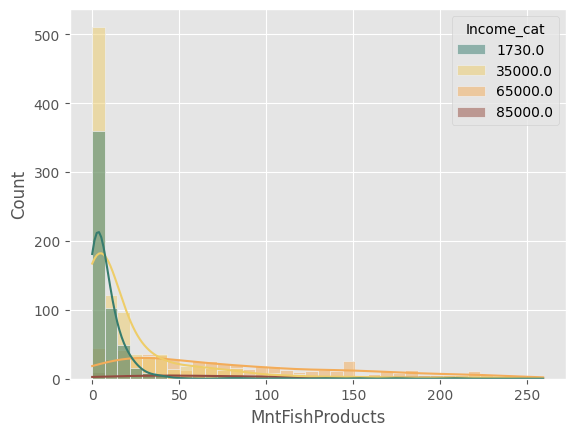

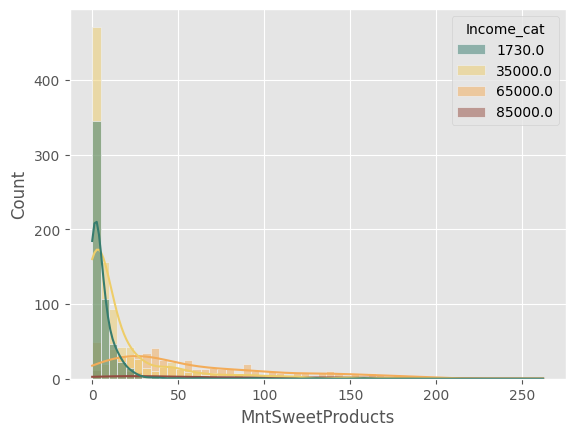

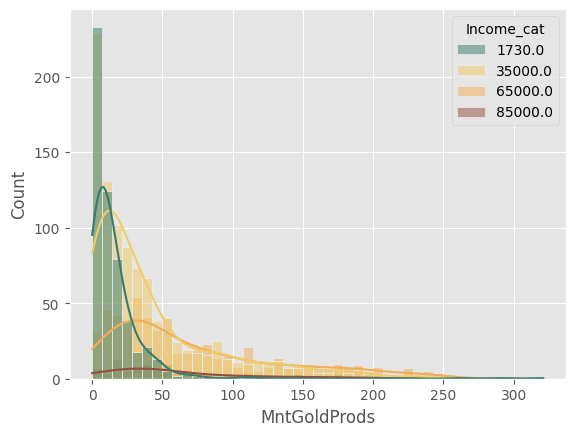

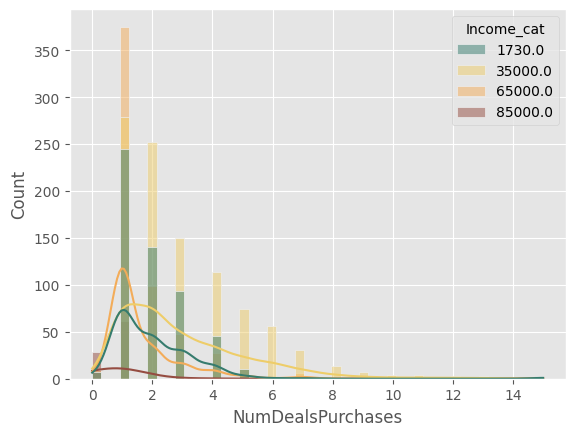

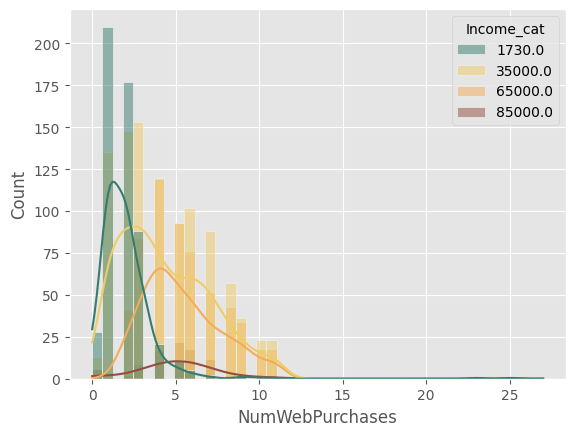

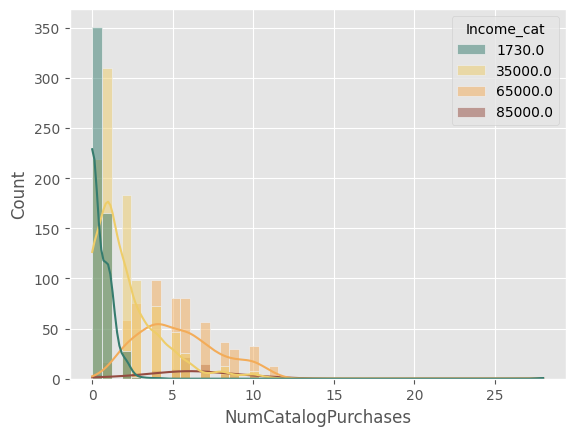

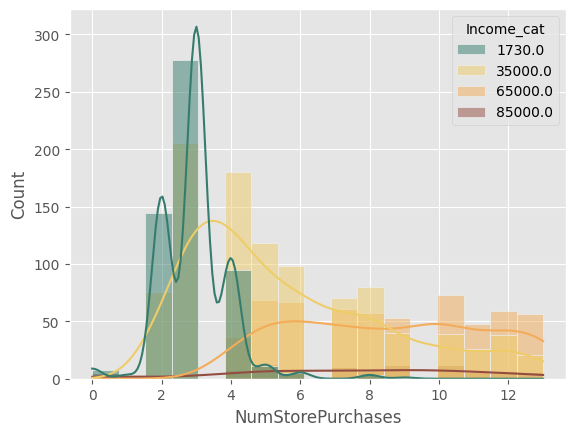

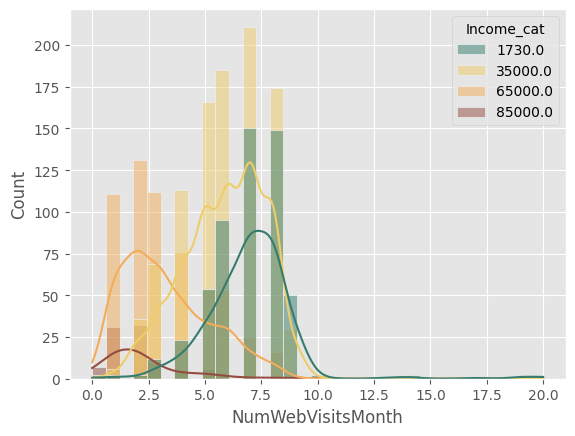

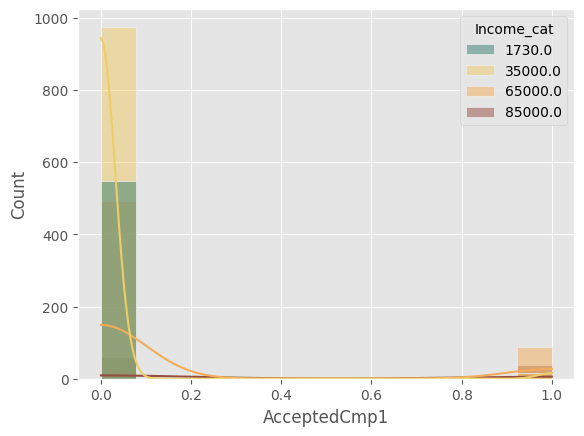

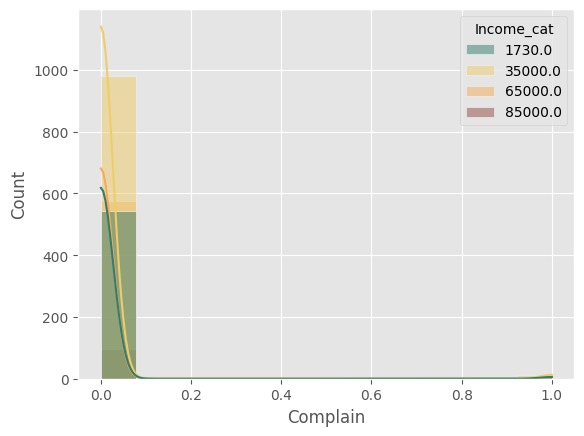

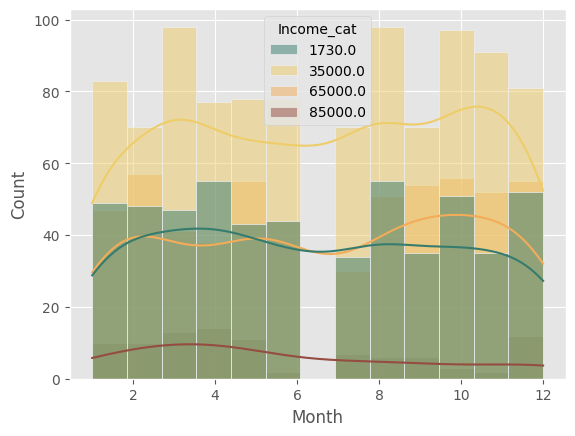

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


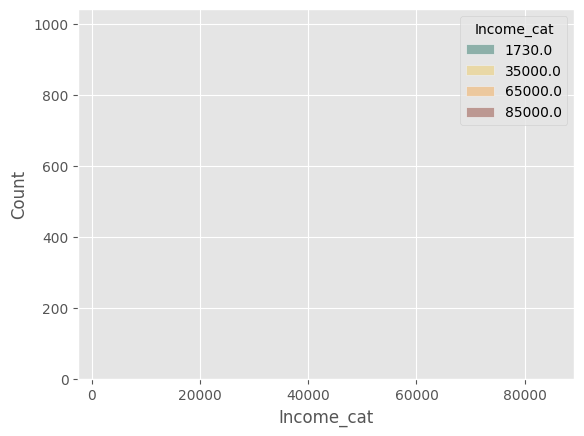

In [31]:
for feat in df.columns:
  if (df[feat].dtype != 'object') | ( feat != 'Income_cat') | (feat != 'Month'):
    sns.histplot(data=df, x=feat, hue='Income_cat', palette=palette[:4], kde=True)
    plt.show()

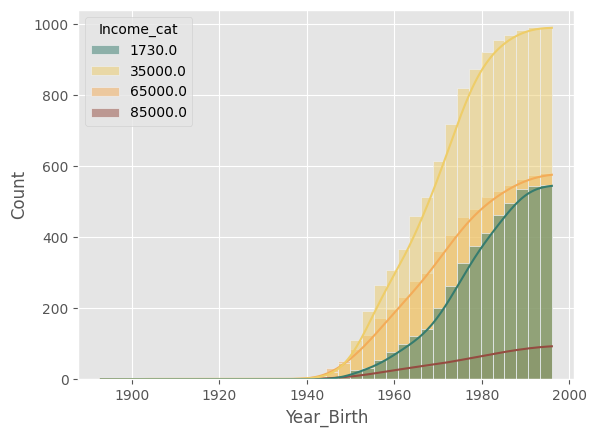

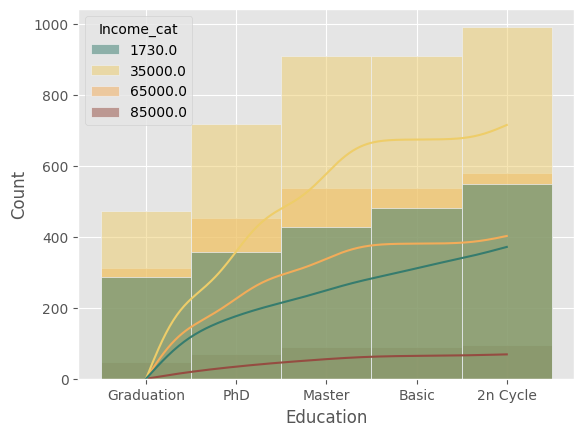

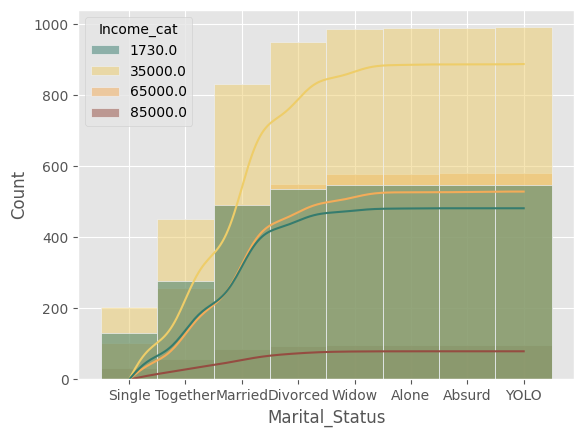

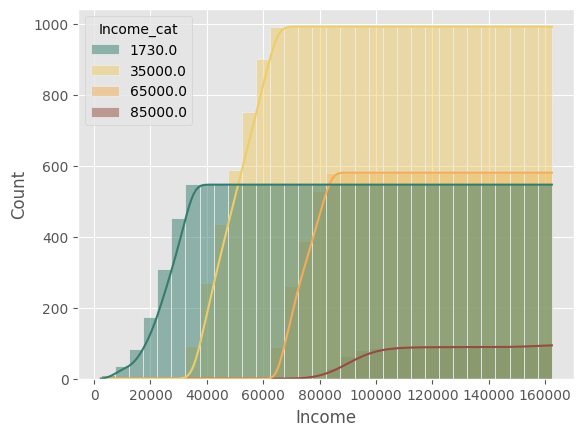

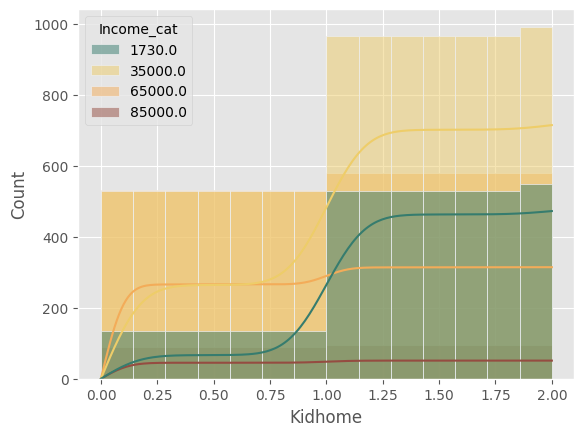

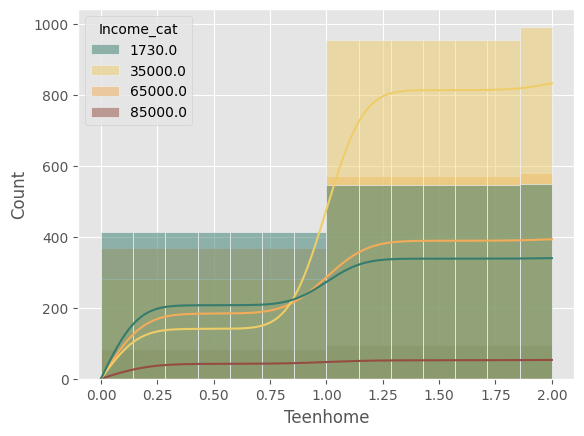

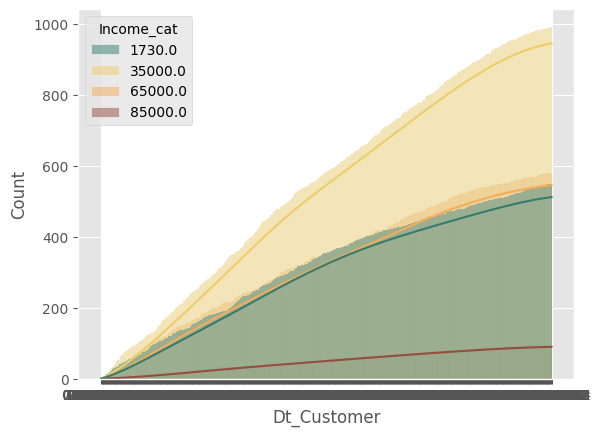

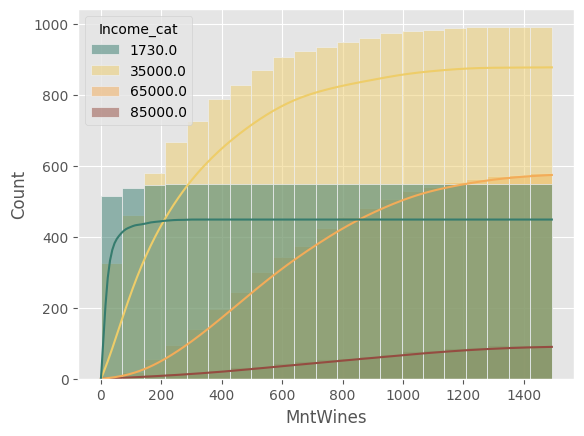

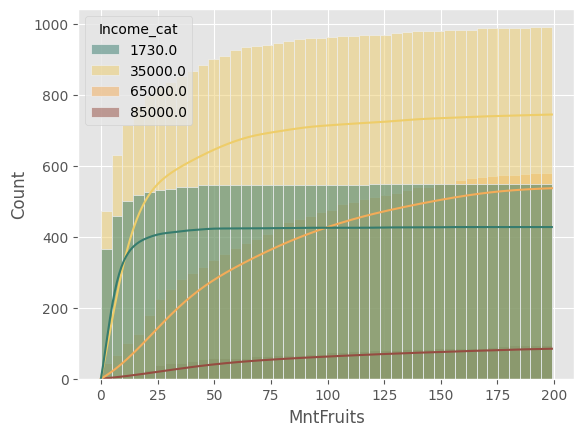

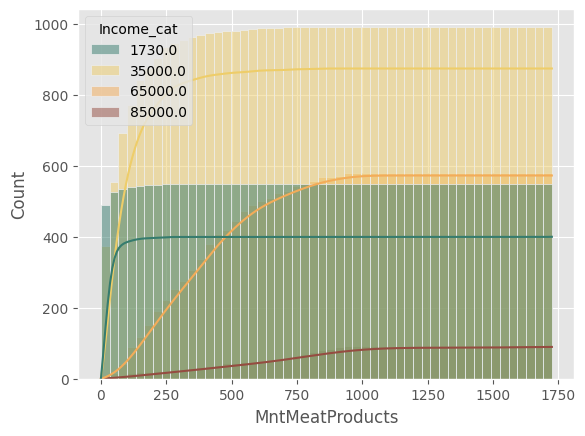

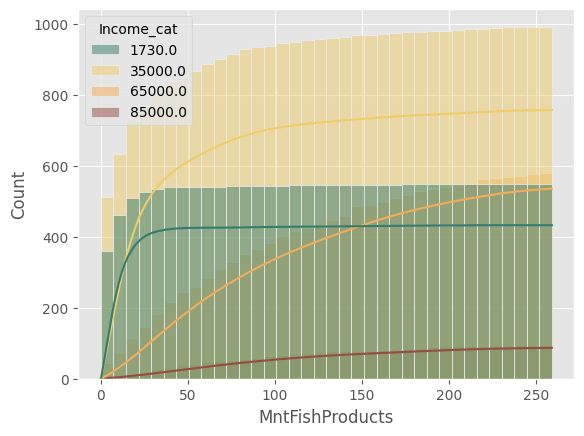

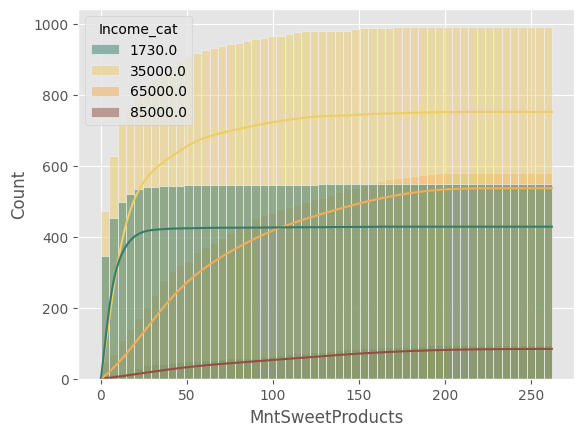

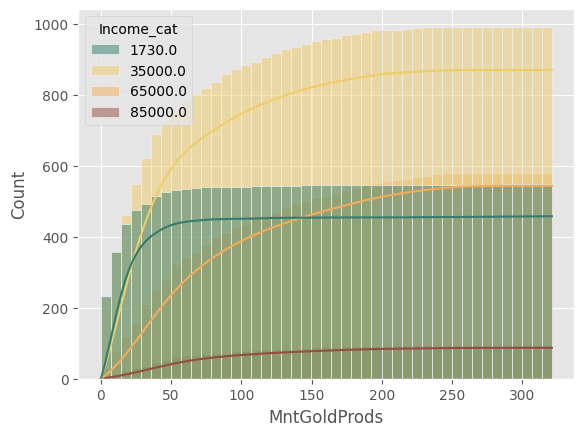

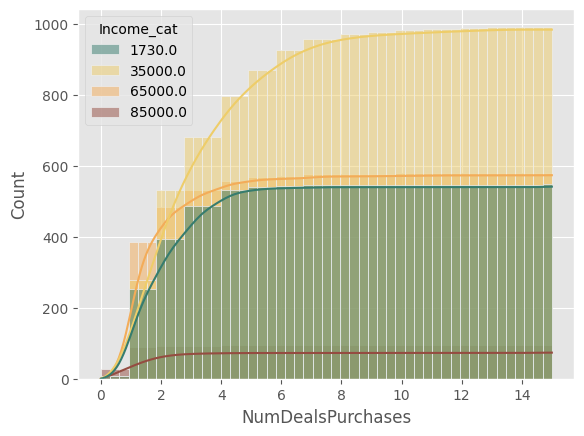

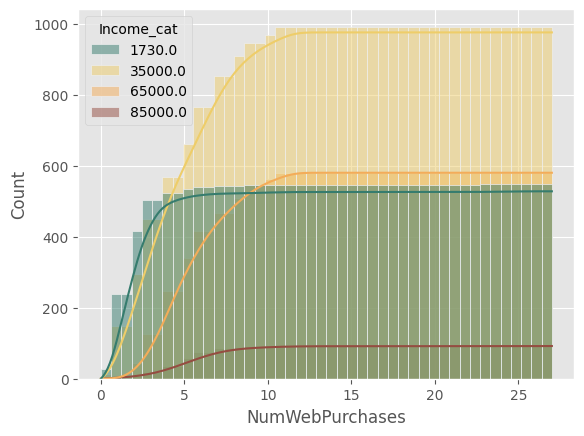

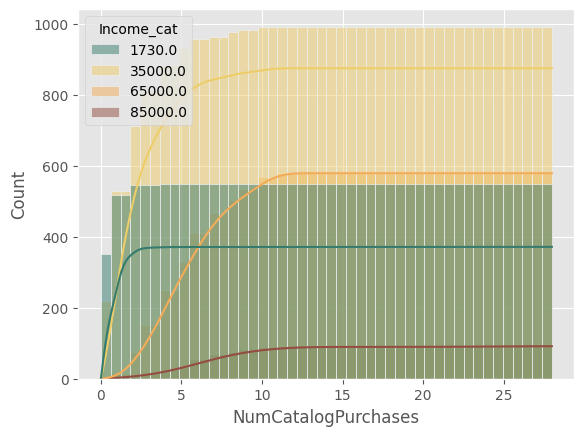

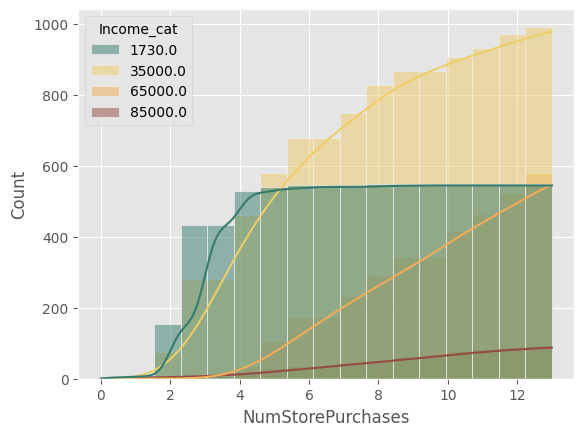

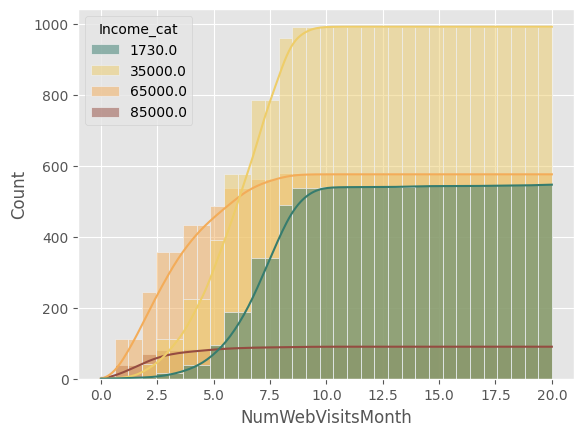

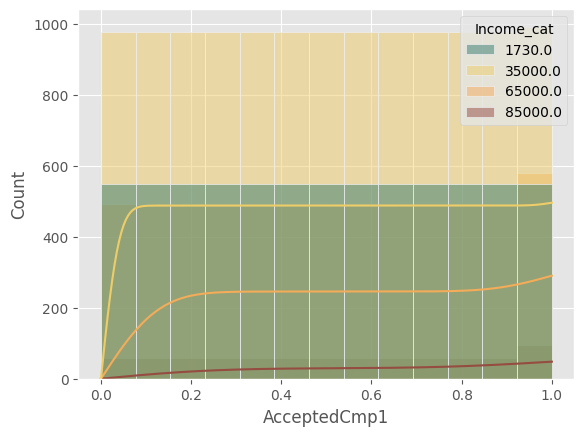

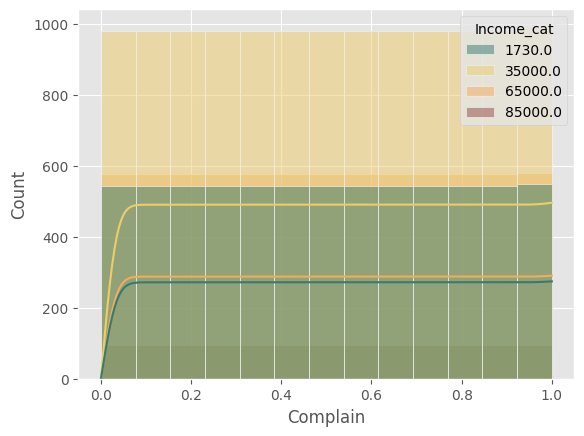

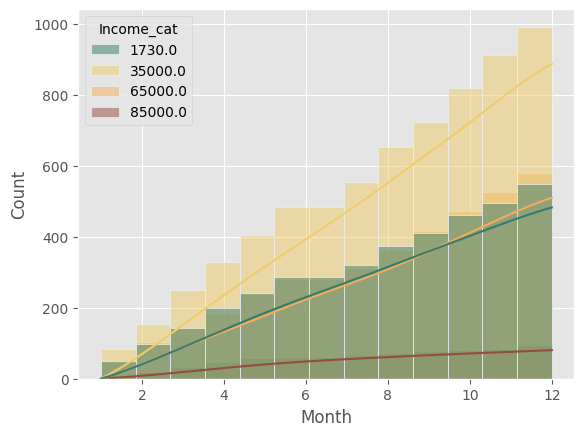

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


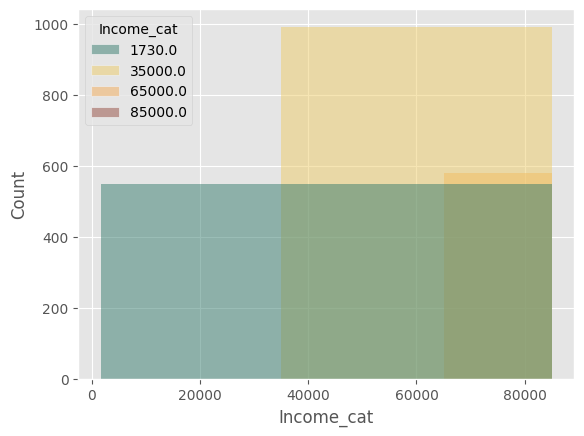

In [33]:
for feat in df.columns:
  if (df[feat].dtype != 'object') | ( feat != 'Income_cat') | (feat != 'Month') :
    sns.histplot(data=df, x=feat, hue='Income_cat', palette=palette[:4], kde=True, cumulative=True)
    plt.show()

In [35]:
df.corrwith(df['Income'], numeric_only=True).sort_values(ascending=False)

,0
Income,1.000000
NumCatalogPurchases,0.696241
MntMeatProducts,0.692119
MntWines,0.687807
NumStorePurchases,0.629959
MntSweetProducts,0.523448
MntFishProducts,0.520095
MntFruits,0.507799
NumWebPurchases,0.458626
MntGoldProds,0.388940


Observations


*  Top income quartile shows mostly no children
*  Mnt Wines - 3rd quartile of income shows high variance of highest amount of purchases
*  No seasonality detected by month
*  NumWebVisitsMonth - 1st and 2nd quartile show high activity while 3rd and 4th show low usage




In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   object  
 2   Marital_Status       2240 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Dt_Customer          2240 non-null   object  
 7   MntWines             2240 non-null   int64   
 8   MntFruits            2240 non-null   int64   
 9   MntMeatProducts      2240 non-null   int64   
 10  MntFishProducts      2240 non-null   int64   
 11  MntSweetProducts     2240 non-null   int64   
 12  MntGoldProds         2240 non-null   int64   
 13  NumDealsPurchases    2240 non-null   int64   
 14  NumWebPurchases      2240 non-null   int64   
 15  NumCatalogPurchases  

In [37]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Month', 'Income_cat'],
      dtype='object')

In [38]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Kidhome']].groupby ('Kidhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,451.173241,39.392885,253.996133,56.162413,40.498840,60.037123
1,104.403782,8.517241,48.862069,12.311457,8.932147,22.408231
2,74.791667,6.770833,33.833333,7.729167,4.708333,17.416667


In [39]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Kidhome']].groupby('Kidhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,583367,50935,328417,72618,52365,77628
1,93859,7657,43927,11068,8030,20145
2,3590,325,1624,371,226,836


In [40]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Kidhome']].groupby('Kidhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,1293,1293,1293,1293,1293,1293
1,899,899,899,899,899,899
2,48,48,48,48,48,48


Observations


*  No children at home leads to more spending on wines
*   Gold Products are very popular for families with no children



In [41]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Teenhome']].groupby('Teenhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,304.822971,33.310017,227.120035,48.658031,33.631261,45.256477
1,300.009709,18.866990,101.432039,25.697087,20.233010,42.587379
2,361.942308,17.519231,124.769231,23.903846,16.076923,44.942308


In [42]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Teenhome']].groupby('Teenhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,352985,38573,263005,56346,38945,52407
1,309010,19433,104475,26468,20840,43865
2,18821,911,6488,1243,836,2337


In [43]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Teenhome']].groupby('Teenhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,1158,1158,1158,1158,1158,1158
1,1030,1030,1030,1030,1030,1030
2,52,52,52,52,52,52


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'NumDealsPurchases'),
  Text(1, 0, 'NumWebPurchases'),
  Text(2, 0, 'NumCatalogPurchases'),
  Text(3, 0, 'NumStorePurchases'),
  Text(4, 0, 'NumWebVisitsMonth')])

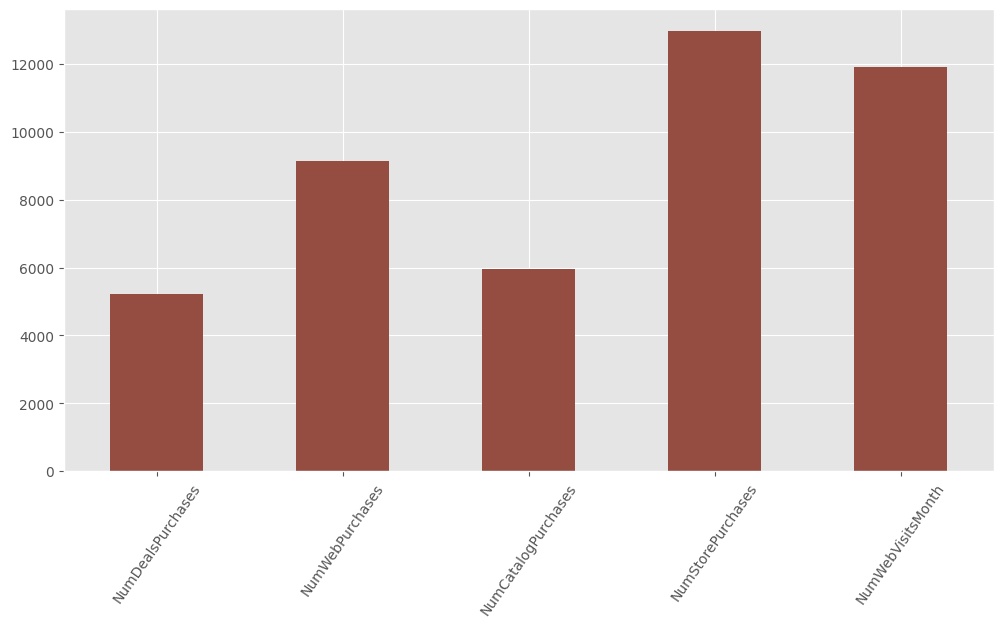

In [45]:
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].sum().plot (kind='bar',figsize=(12,6), color=palette[3])
plt.xticks(rotation=55)

In [46]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']

<Axes: >

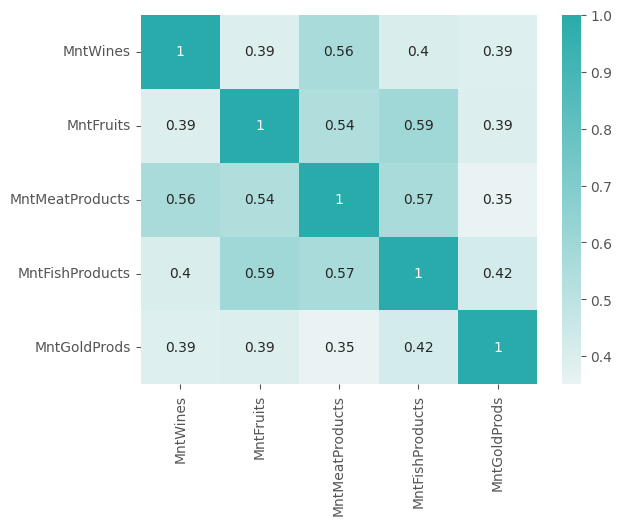

In [47]:
sns.heatmap(df[products].corr(), annot=True, cmap=sns.light_palette('#28ABAA', as_cmap=True))

Observations


*   Meat and Fish have a correlation of .57
*   Meat and Wines have a correlation of .56
*   Fruits and Fish have a correlation of .59

---
* These are products that have higher correlation and it may be beneficial to do some sort of marketing sale with these products since they seem to be bought together




In [58]:
df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Month', 'Income_cat'],
      dtype='object')

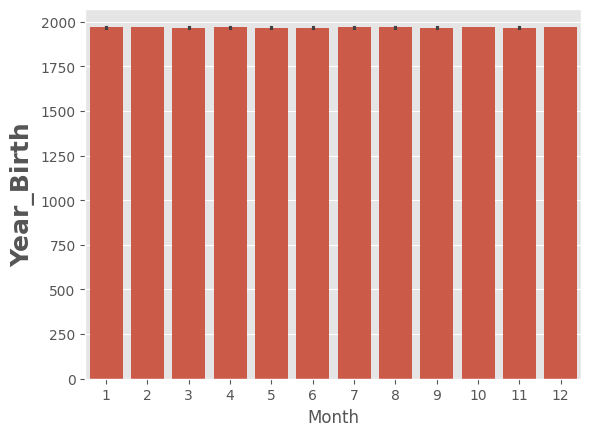

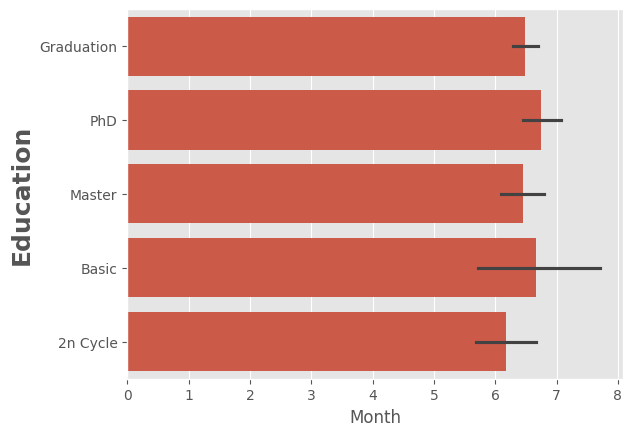

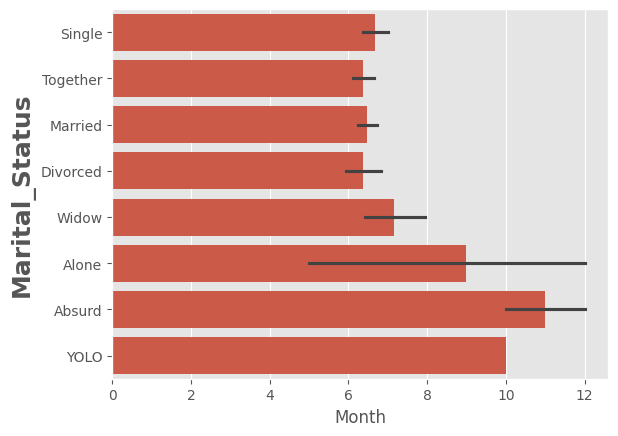

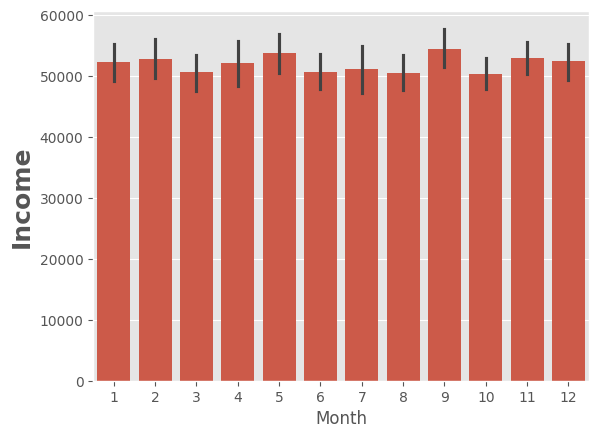

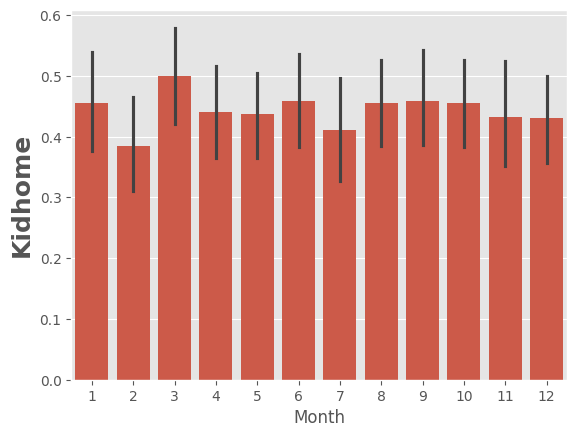

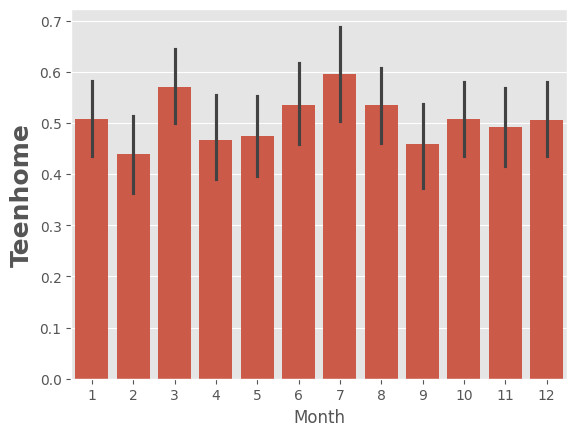

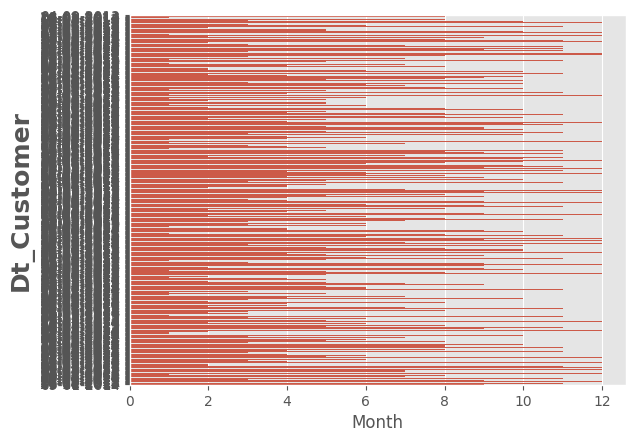

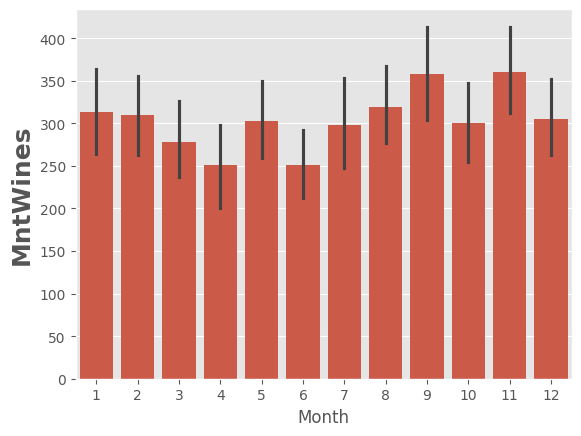

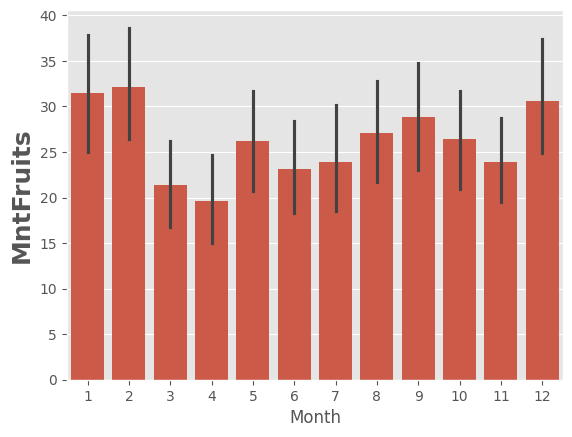

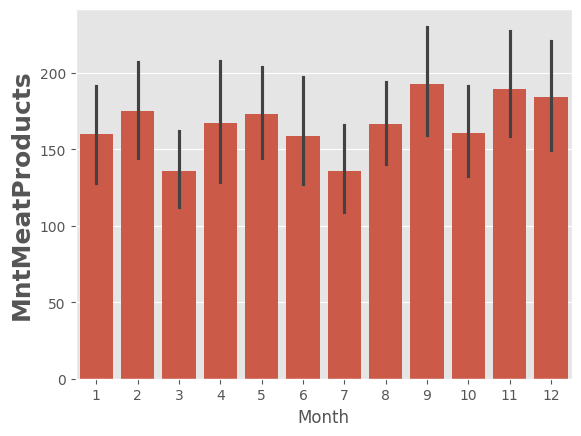

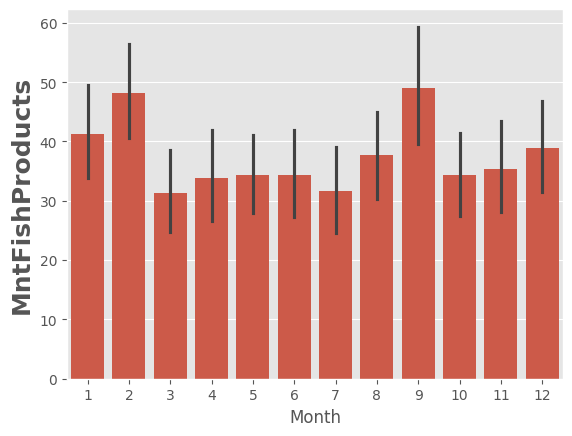

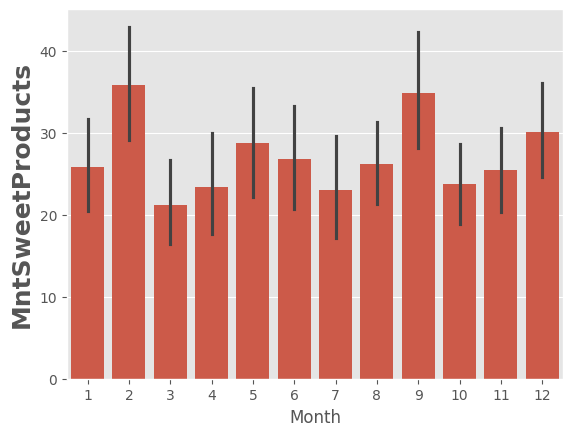

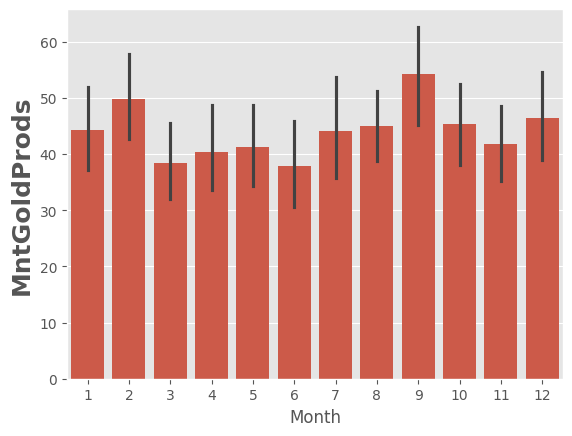

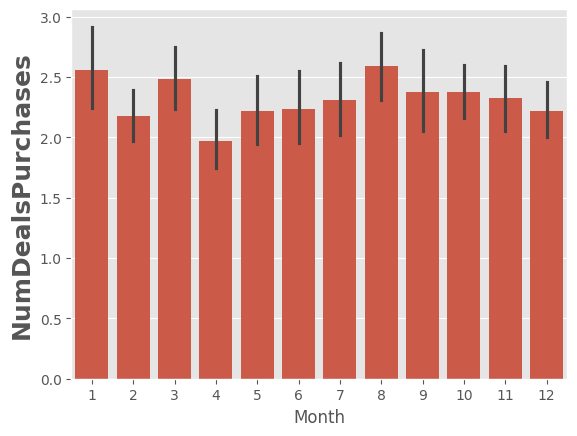

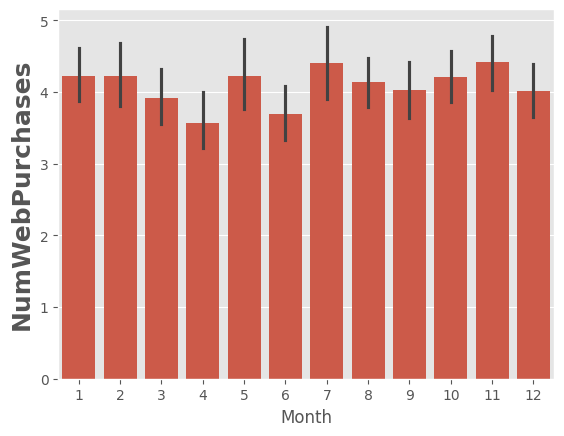

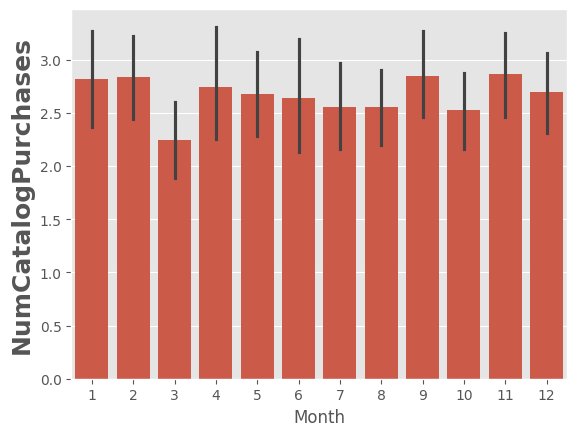

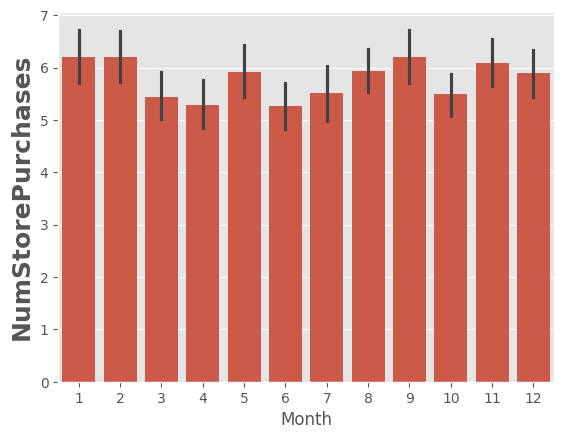

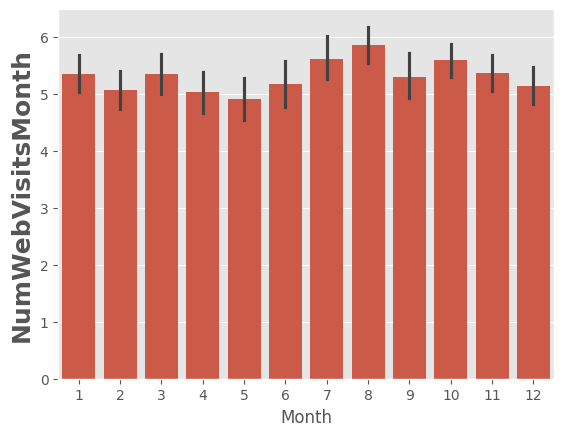

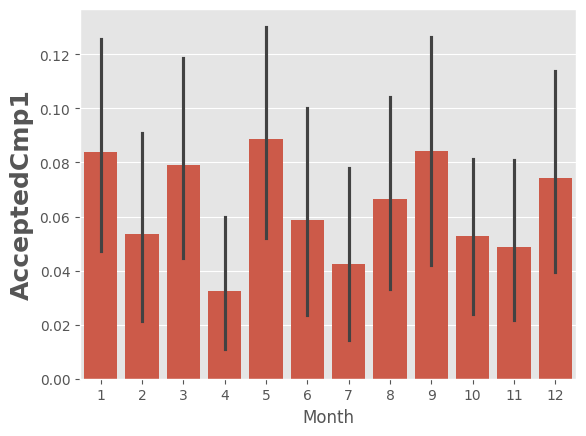

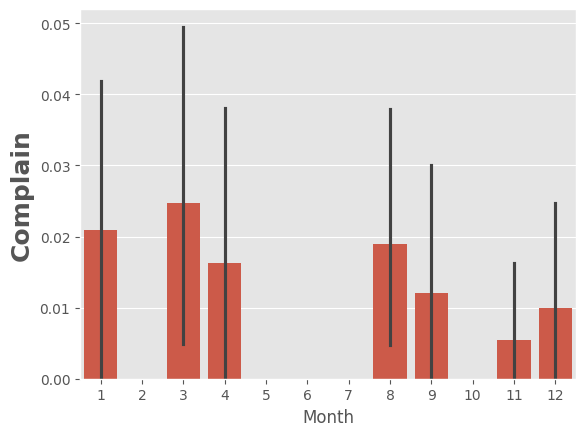

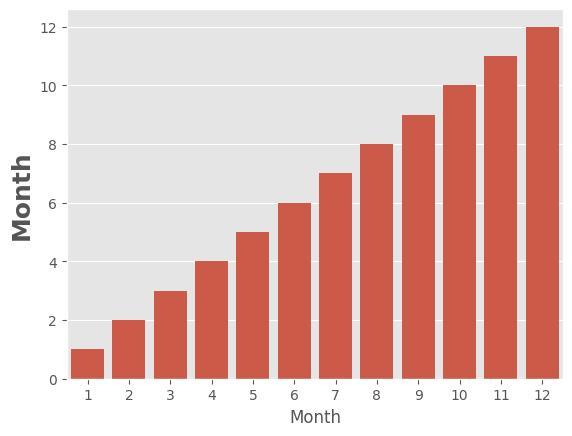

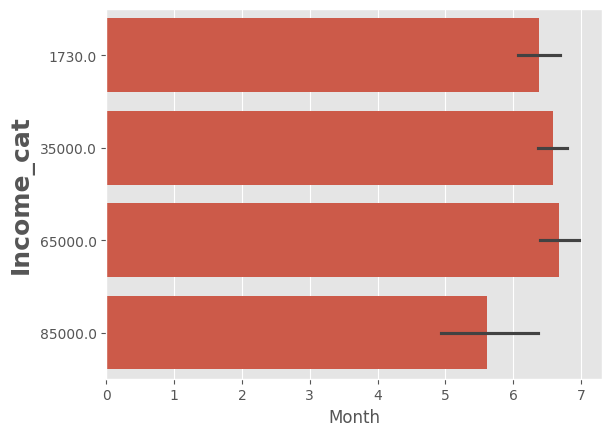

In [66]:
for p in df.columns:
  sns.barplot(data=df, x='Month', y=p)
  plt.ylabel(p, fontsize=18, fontweight='bold')
  plt.show()

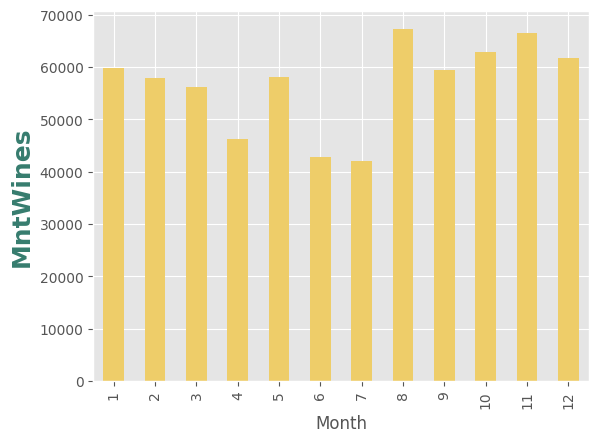

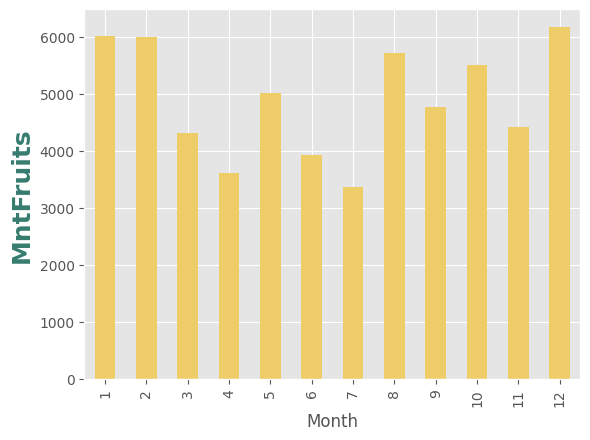

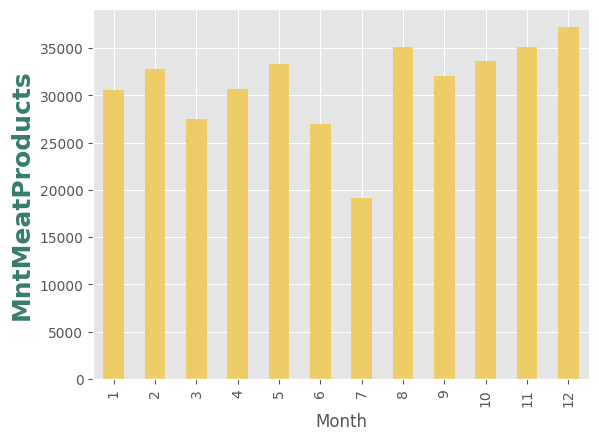

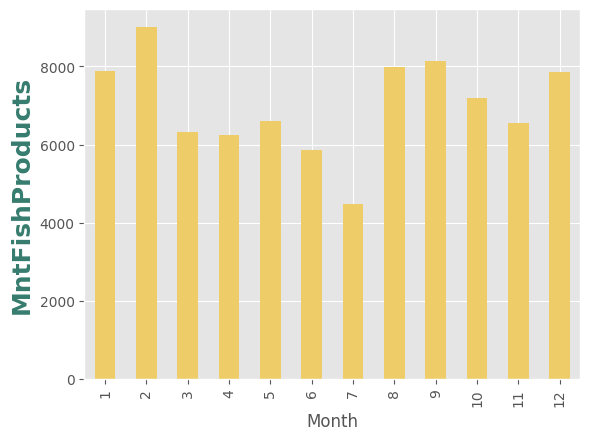

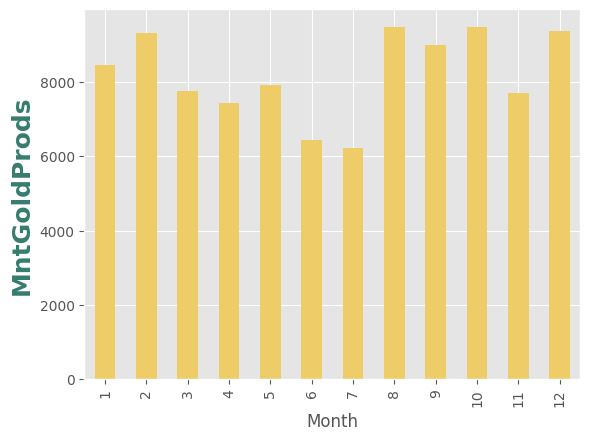

In [73]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']
for p in products:
  df.groupby('Month')[p].sum().plot (kind='bar', color=palette[1])
  plt.ylabel (p, fontsize=18, fontweight='bold', color=palette[0])
  plt.show()

Observations


*   Months 8 - 12 are popluar with Wines
*   Fruits are popular in Months 12, 1, 2
*   Fish are popular in Months 8 - 2








Promotions/Targeting Ideas


---



*   Offer larger promotion of meat and fish to increase the low month of July - will help average revenue during this month
*   Combo promotion of wine and meat to families with no children


